Accuracy: 100.00%


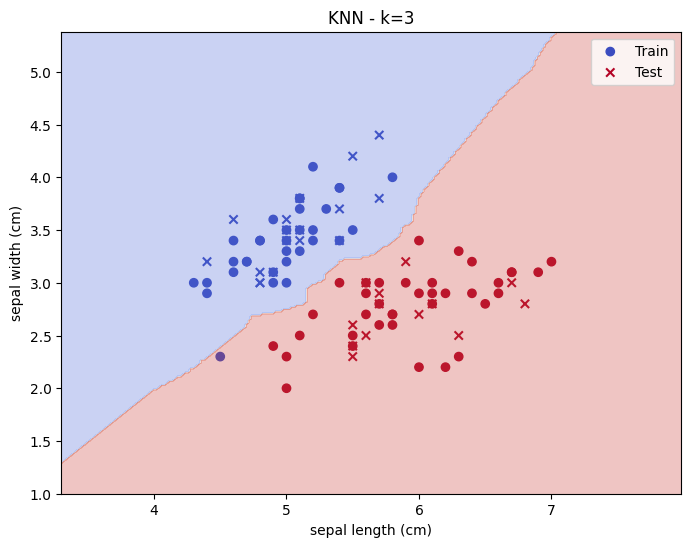

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = datasets.load_iris()
X = data.data[:, :2]
y = data.target
X, y = X[y != 2], y[y != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 3
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label="Test")
h = .02
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, h), np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f"KNN - k={k}")
plt.legend()
plt.show()